In [33]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
import cv2
import skdemo
import numpy as np
from scipy.spatial import distance as dist

the dim of orininal image is (768, 1024, 3)
the dim of resize is (100, 75)


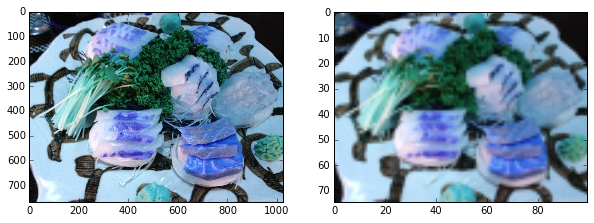

In [15]:
 # load the image and show it
image = cv2.imread("./data/thumb_IMG_4079_1024.jpg")

# we need to keep in mind aspect ratio so the image does
# not look skewed or distorted -- therefore, we calculate
# the ratio of the new image to the old image
r = 100.0 / image.shape[1]
dim = (100, int(image.shape[0] * r))

print "the dim of orininal image is %s" %str(image.shape)
print "the dim of resize is %s" %str(dim)

# perform the actual resizing of the image and show it
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

skdemo.imshow_all(image, resized)

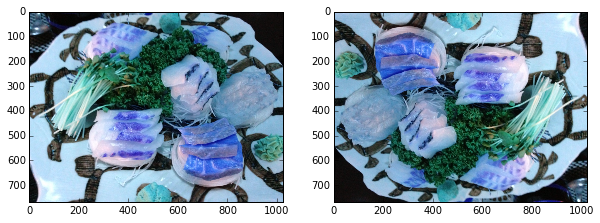

In [16]:
# grab the dimensions of the image and calculate the center of the image
(h, w) = image.shape[:2]
center = (w / 2, h / 2)
 
# rotate the image by 180 degrees
M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
skdemo.imshow_all(image, rotated)

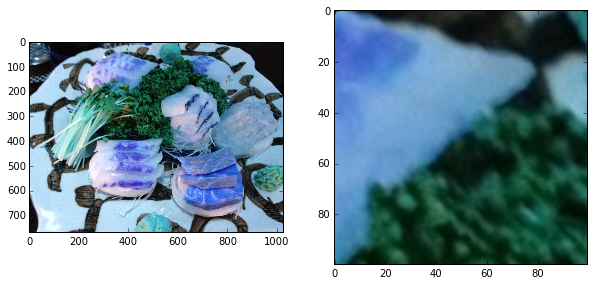

In [17]:
# crop the image using array slices -- it's a NumPy array
# after all!
# supply the startY and endY coordinates
cropped = image[70:170, 440:540]
skdemo.imshow_all(image, cropped)

(0, 256)

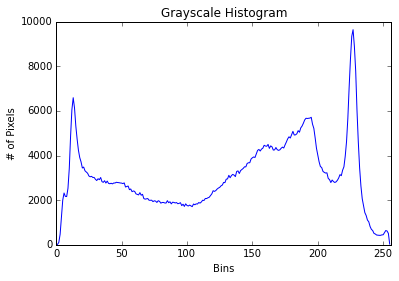

In [19]:
# Common choices include: Euclidean, correlation, Chi-squared, intersection, and Bhattacharyya
image = cv2.imread("./data/thumb_IMG_4079_1024.jpg")

# convert the image to grayscale and create a histogram
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist(images =[gray], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

flattened feature vector size: 768


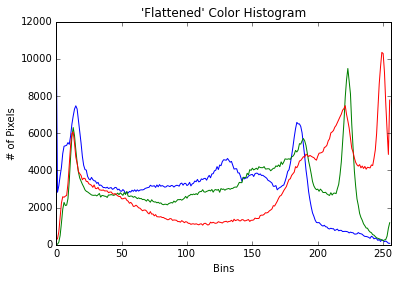

In [26]:
# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)
 
	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])
 
# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print "flattened feature vector size: %d" % (np.array(features).flatten().shape)

2D histogram shape: (32, 32), with 1024 values


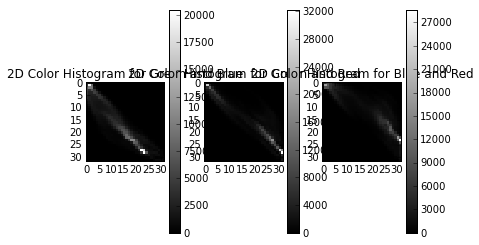

In [29]:
image = cv2.imread("./data/thumb_IMG_4079_1024.jpg")
chans = cv2.split(image)

# let's move on to 2D histograms -- I am reducing the
# number of bins in the histogram from 256 to 32 so we
# can better visualize the results
fig = plt.figure()
 
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)
 
# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Red")
plt.colorbar(p)
 
# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Blue and Red")
plt.colorbar(p)
 
# finally, let's examine the dimensionality of one of
# the 2D histograms
print "2D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0])

In [30]:
# our 2D histogram could only take into account 2 out
# of the 3 channels in the image so now let's build a
# 3D color histogram (utilizing all channels) with 8 bins
# in each direction -- we can't plot the 3D histogram, but
# the theory is exactly like that of a 2D histogram, so
# we'll just show the shape of the histogram
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print "3D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0])

3D histogram shape: (8, 8, 8), with 512 values


In [34]:
np.random.seed(42)
x = np.random.rand(4)
y = np.random.rand(4)
print x
print y

[ 0.37454012  0.95071431  0.73199394  0.59865848]
[ 0.15601864  0.15599452  0.05808361  0.86617615]


In [39]:
print "dist of euclidean is %s " %dist.euclidean(x, y)
print "dist of cityblock is %s " %dist.cityblock(x, y)
print "dist of chebyshev is %s " %dist.chebyshev(x, y)

x = np.random.random_integers(0, high = 1, size =(4,))
y = np.random.random_integers(0, high = 1, size =(4,))
print "dist of hamming is %s " %dist.hamming(x, y)

dist of euclidean is 1.41421356237 
dist of cityblock is 2 
dist of chebyshev is 1 
dist of hamming is 0.5 


In [46]:
image = cv2.imread("./data/thumb_IMG_4096_1024.jpg")
print "height : %d, width : %d, channel : %d" %(image.shape[0], image.shape[1], image.shape[2])

height : 1024, width : 768, channel : 3


In [48]:
raw = image.flatten()
print "dim of flatten image is %s" %raw.shape
print image.shape[0] * image.shape[1] * image.shape[2]

dim of flatten image is 2359296
2359296


In [53]:
means = cv2.mean(image)
print "the mean of blue channel : %s" %means[0]
print "the mean of green channel : %s" %means[1]
print "the mean of red channel : %s" %means[2]

means = means[:3]

the mean of blue channel : 112.442942301
the mean of green channel : 136.827481588
the mean of red channel : 157.764306386


In [59]:
(means, stds) = cv2.meanStdDev(image)
stats = np.concatenate([means, stds]).reshape((2,3))
print stats

[[ 112.4429423   136.82748159  157.76430639]
 [  50.67424972   56.84742715   57.85461429]]


In [62]:
# 3D histogram with 8 bins per channel
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print 
print "hist feature : %s" %str(hist.shape)
# hist.flatten()


hist feature : (8, 8, 8)


In [2]:
import nole

ImportError: No module named nolearn